In [1]:
#loading the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the warning library to ignore the warnings. 
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
dataset = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#checking the shape of dataset
dataset.shape

(364558, 53)

In [5]:
#checking the null values present in whole dataset
dataset.isnull().sum(axis=0)

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

Above the observation, there are so many null values are present in different columns.

So, Based on our requirement. Considering only 2 columns Complaint Type and City


In [6]:
#creating new dataset with only 2 columns Complaint type and City
New_dataset = dataset.loc[:, ["Complaint Type", "City"]]

In [7]:
#checking the 5 rows
New_dataset.head()

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST


In [8]:
#checking the shape
New_dataset.shape

(364558, 2)

In [9]:
#checking the null values
New_dataset.isnull().sum(axis=0)

Complaint Type       0
City              2997
dtype: int64

in city column null values are 2997.
if null value are less than 30% of total values then we will drop null values.

In [10]:
#checking the percentage of null values.
print("% of null values is:", (New_dataset["City"].isnull().sum(axis=0)/New_dataset.shape[0])*100)

% of null values is: 0.8220914093230707


% of null value is less then 1%. So we will drop null values.

In [11]:
#droping the null values
New_dataset.dropna(inplace=True)

In [12]:
#checking size of New_dataset
New_dataset.shape

(361561, 2)

In [13]:
#display complaint Type and City
New_dataset

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
...,...,...
364553,Illegal Parking,WOODHAVEN
364554,Noise - Vehicle,BRONX
364555,Noise - Street/Sidewalk,NEW YORK
364556,Blocked Driveway,BRONX


In [14]:
#checking the parameter
New_dataset.describe()

,Complaint Type,City
count,361561,361561
unique,22,53
top,Blocked Driveway,BROOKLYN
freq,100548,118862


In [15]:
#relation b/w city and complaint 
relation_bw_city_complaint = pd.crosstab(New_dataset['City'], columns=New_dataset['Complaint Type'])

Text(0.5, 1.0, 'Relation b/w Complaint Type and City')

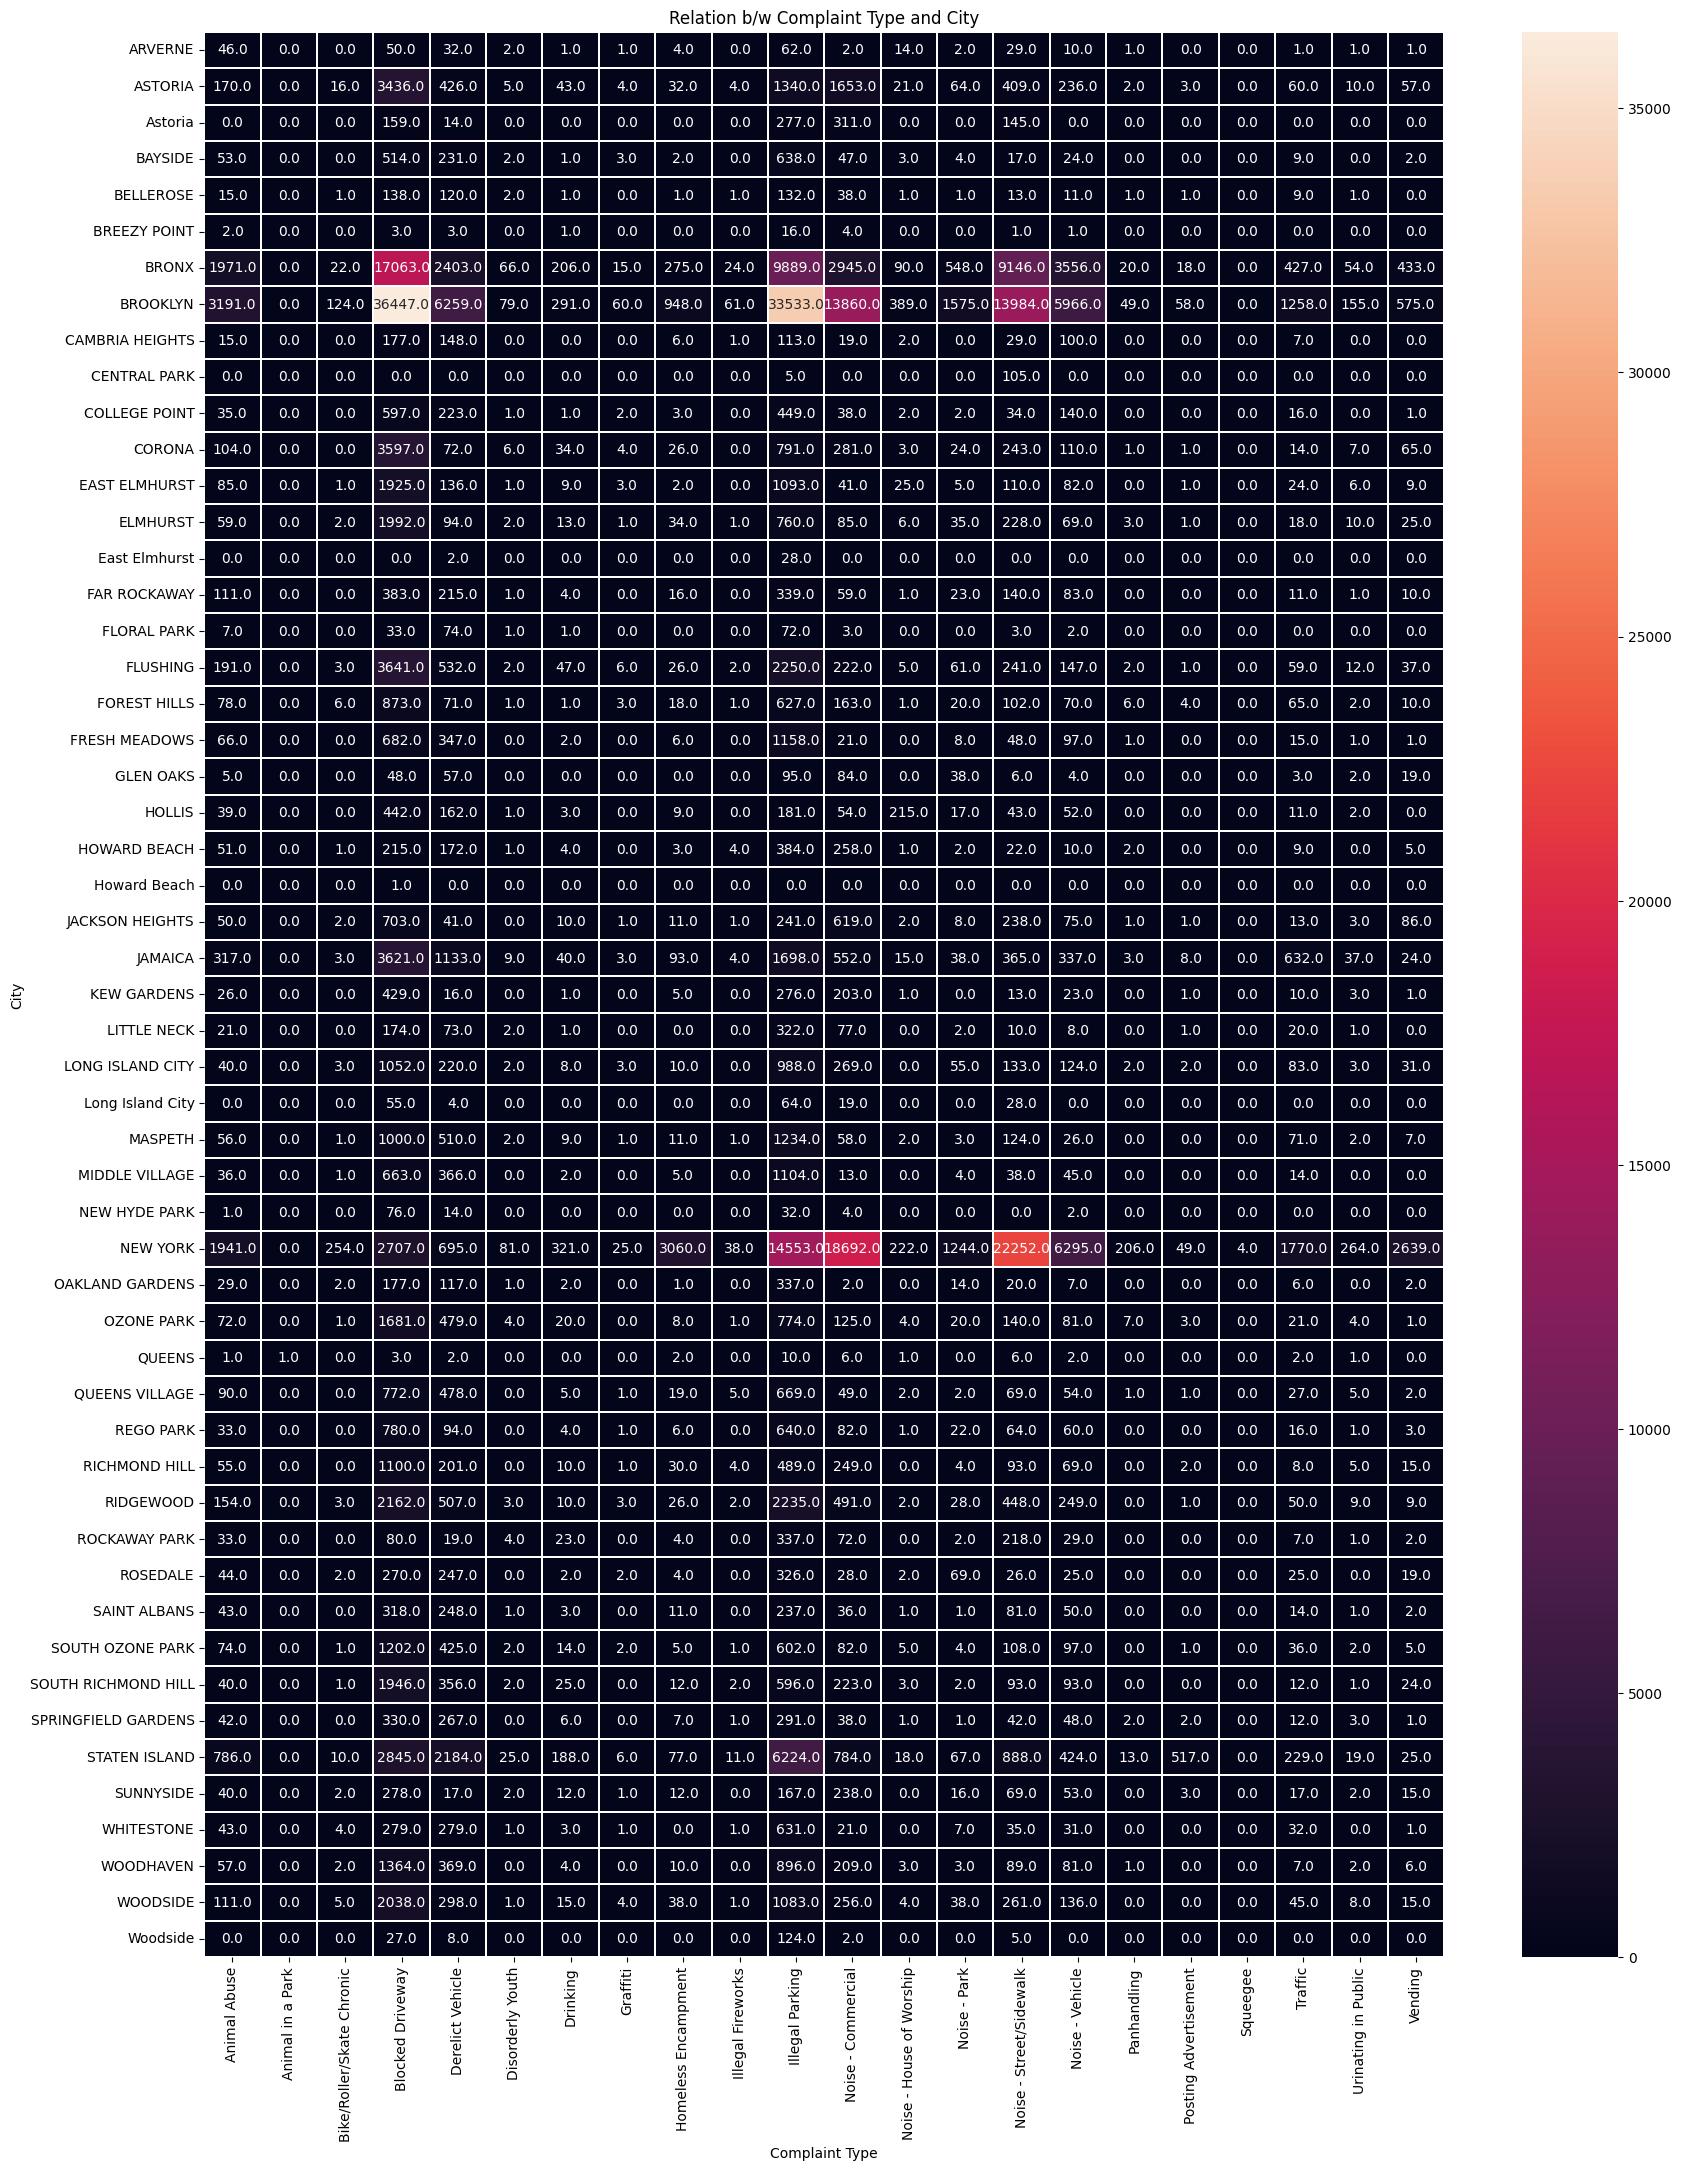

In [16]:
#relation b/w city and complaint 
plt.figure(figsize=(20,25))
sns.heatmap(relation_bw_city_complaint, annot=True, fmt='.1f', linewidths=.1)
plt.title('Relation b/w Complaint Type and City')

In [17]:
#find the top 10 complaint type
New_dataset['Complaint Type'].value_counts().head(10)

Complaint Type
Blocked Driveway           100548
Illegal Parking             91412
Noise - Street/Sidewalk     51054
Noise - Commercial          43687
Derelict Vehicle            21460
Noise - Vehicle             19294
Animal Abuse                10529
Traffic                      5195
Homeless Encampment          4878
Vending                      4185
Name: count, dtype: int64

Text(0, 0.5, 'Count')

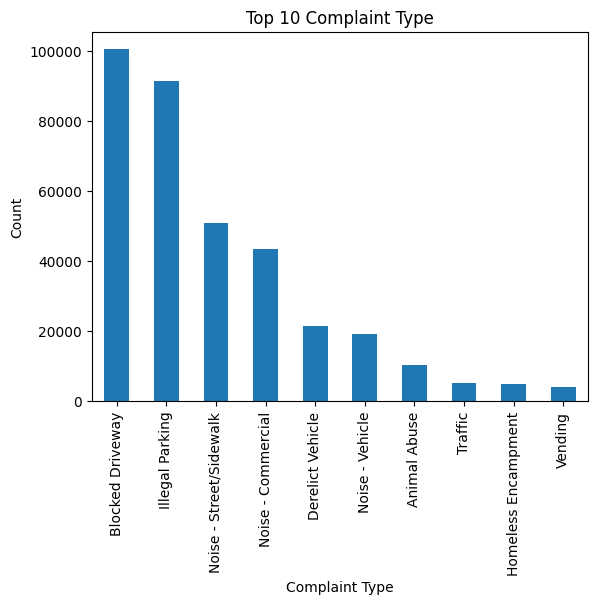

In [18]:
#Top 10 complaint Type 
New_dataset['Complaint Type'].value_counts().head(10).plot(kind='bar', title='Top 10 Complaint Type')
plt.ylabel('Count')

<Axes: title={'center': 'Count Vs Complaint Type'}, xlabel='Complaint Type'>

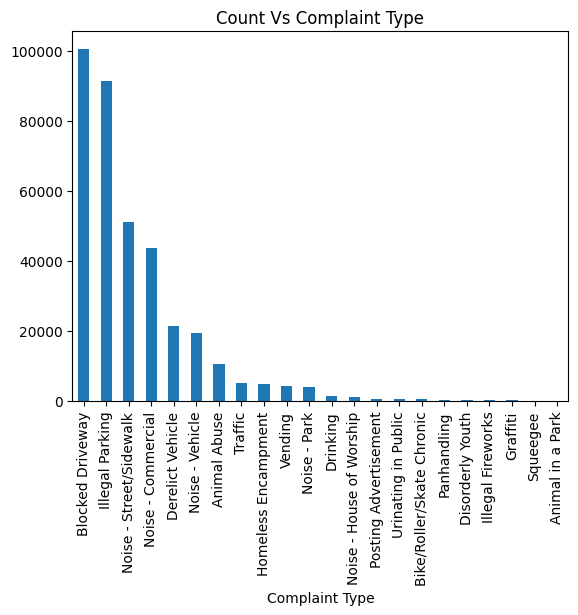

In [19]:
#count vs Complaint type
New_dataset['Complaint Type'].value_counts().plot(kind='bar', title="Count Vs Complaint Type")

In [20]:
#Display the major complaint types and their count
major_complaint = New_dataset['Complaint Type'].value_counts().head(11)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Blocked Driveway'),
  Text(1, 0, 'Illegal Parking'),
  Text(2, 0, 'Noise - Street/Sidewalk'),
  Text(3, 0, 'Noise - Commercial'),
  Text(4, 0, 'Derelict Vehicle'),
  Text(5, 0, 'Noise - Vehicle'),
  Text(6, 0, 'Animal Abuse'),
  Text(7, 0, 'Traffic'),
  Text(8, 0, 'Homeless Encampment'),
  Text(9, 0, 'Vending'),
  Text(10, 0, 'Noise - Park')])

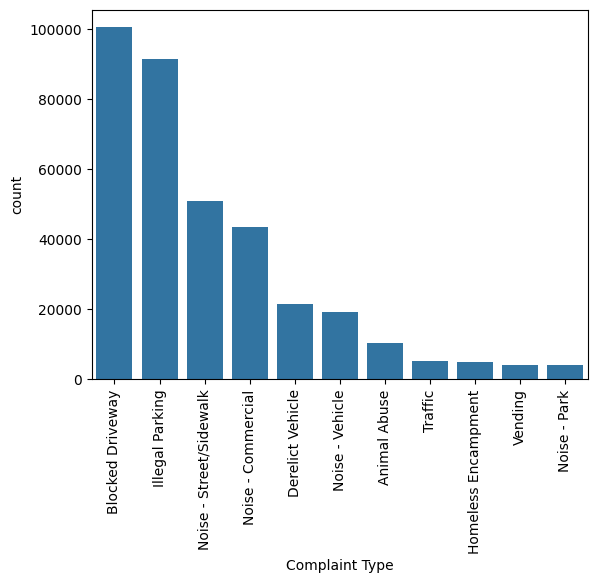

In [21]:
sns.barplot(major_complaint)
plt.xticks(rotation=90)

In [22]:
#this project completed by Deepak Kumar (Thank you)